In [1]:
import torch
import os
import struct
import matplotlib.pyplot as plt
import numpy as np
# import torchvision
# from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import copy

In [2]:
import numpy as np
def read_all_images(path_to_data):
   """
   :param path_to_data: the file containing the binary images from the STL-10 dataset
   :return: an array containing all the images
   """

   with open(path_to_data, 'rb') as f:
       # read whole file in uint8 chunks
       everything = np.fromfile(f, dtype=np.uint8)

       images = np.reshape(everything, (-1, 3, 96, 96))
       

       images = np.transpose(images, (0, 3, 2, 1))
       images =  np.dot(images[:,:,:,0:3],[0.299,0.587,0.114])
       print(images.shape)
       images = np.reshape(images, (-1,96*96))
       return images
                      
def read_all_labels(path_to_data):
   """
   :param path_to_data: the file containing the binary images from the STL-10 dataset
   :return: an array containing all the images
   """

   with open(path_to_data, 'rb') as f:
       # read whole file in uint8 chunks
       everything = np.fromfile(f, dtype=np.uint8)

       return everything


In [4]:
import os

images = read_all_images("../AML_Assignment2/data/stl10_binary/train_X.bin")
label = read_all_labels("../AML_Assignment2/data/stl10_binary/train_y.bin")

import torch.utils.data as data_utils


images = torch.from_numpy(images)
labels = torch.from_numpy(label)
labels = labels.type(torch.FloatTensor)
images = images.type(torch.FloatTensor)
train_l = data_utils.TensorDataset(images, labels)
trainLoader= data_utils.DataLoader(train_l, batch_size=50, shuffle=True)


# Train_data_t = torch.from_numpy(Train_data_t)
# Train_labels_t = torch.from_numpy(Train_labels_t)
# train_data = data_utils.TensorDataset(Train_data_t, Train_labels_t)
# train_loader = data_utils.DataLoader(train_data, batch_size=50, shuffle=True)
# Test_data =torch.from_numpy(Test_data)
# Test_labels= torch.from_numpy(Test_labels)
# test_data = data_utils.TensorDataset(Test_data, Test_labels)
# test_loader = data_utils.DataLoader(test_data, batch_size=50, shuffle=True)


# print (images.shape)

(5000, 96, 96)


In [5]:
print(images.size())

torch.Size([5000, 9216])


In [6]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(96*96, 96*48),
            nn.ReLU(True))
        self.encoder2 = nn.Sequential(
            nn.Linear(96*48, 48*48),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(48*48,96*48),
            nn.ReLU(True))
        self.decoder2 = nn.Sequential(
            nn.Linear(96*48,96*96))

    def forward(self, x):
        x = self.encoder(x)
        x= self.encoder2(x)
        x = self.decoder(x)
        x= self.decoder2(x)
        return x

In [11]:
model = autoencoder().cuda()
criterion = nn.MSELoss()
num_epochs = 100
learning_rate = 0.00001
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

# lo=[]
# ep=[]
# for epoch in range(num_epochs):
#     for i, (images,labels) in enumerate(trainLoader):
#         images = images.to(device)
# #         batch_x = images[i:i+batch_size]
# #         batch_x = Variable(torch.cuda.FloatTensor(batch_x))
        
#         output = model(batch_x)
#         loss = criterion(output, batch_x)
#         # ===================backward====================
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     # ===================log========================
#     print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.data[0]))
#     lo.append(loss.data[0])
    
# num_epochs=50
# loss = Variable(torch.cuda.FloatTensor([0]))
los =[]
epoc=[]
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
total_step = len(images)
criteria  = nn.CrossEntropyLoss()
for epoch in range(num_epochs):
    for i, (images,label) in enumerate(trainLoader):
#         images = images.type(torch.FloatTensor)
#         label = label.type(torch.FloatTensor)
#             images = torch.FloatTensor(images)
        images = images.to(device)
#         label = label.to(device)
#             print(Train_labels_t[i])
#             labels = Variable(torch.LongTensor([Train_labels_t[i]])).to(device)
        # Forward pass
#             print(images.size())
#             images = images.unsqueeze(0)
        optimizer.zero_grad()
        outputs = model(images)
#         print(type(outputs[0]))
        loss = criterion(outputs, images)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        los.append(loss.data[0])
            
#             print (loss.data[0])
#             lo.append(loss_contrastive.data[0])
            
#             loss_contrastive += Variable(torch.FloatTensor([0]))
#             loss_contrastive.backward(retain_graph=True)
            
#         optimizer.step()
#         loss = Variable(torch.cuda.FloatTensor([0]))
#         else:
#             images = torch.FloatTensor(images)
#             images = images.to(device)
# #             print(Train_labels_t[i])
#             labels = Variable(torch.LongTensor([Train_labels_t[i]])).to(device)
#             # Forward pass
# #             print(images.size())
#             images = images.unsqueeze(0)
#             outputs = model(images)
# #             print(outputs,"        ",labels)
#             loss += criterion(outputs, labels)
            
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, loss.item()))

            

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/100], Loss: 3401.7180
Epoch [2/100], Loss: 2681.9119
Epoch [3/100], Loss: 2702.0671
Epoch [4/100], Loss: 1833.4304
Epoch [5/100], Loss: 1873.0470
Epoch [6/100], Loss: 1896.4517
Epoch [7/100], Loss: 1568.6943
Epoch [8/100], Loss: 1420.9674
Epoch [9/100], Loss: 1448.6232
Epoch [10/100], Loss: 1503.5742
Epoch [11/100], Loss: 1319.1842
Epoch [12/100], Loss: 1382.0253
Epoch [13/100], Loss: 1387.9977
Epoch [14/100], Loss: 1339.5614
Epoch [15/100], Loss: 1259.2261
Epoch [16/100], Loss: 1141.5175
Epoch [17/100], Loss: 1226.1046
Epoch [18/100], Loss: 1128.3909
Epoch [19/100], Loss: 1062.3964
Epoch [20/100], Loss: 1336.7045
Epoch [21/100], Loss: 1120.1274
Epoch [22/100], Loss: 981.3817
Epoch [23/100], Loss: 954.1306
Epoch [24/100], Loss: 1137.1788
Epoch [25/100], Loss: 1101.3022
Epoch [26/100], Loss: 1105.2186
Epoch [27/100], Loss: 914.4884
Epoch [28/100], Loss: 963.0297
Epoch [29/100], Loss: 948.4508
Epoch [30/100], Loss: 1073.7030
Epoch [31/100], Loss: 974.4604
Epoch [32/100], Loss: 8

In [ ]:
torch.save(model, "Full_Autoencoder.pth")
model = torch.load("Full_Autoencoder.pth")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
images = images.to(device)

epoc=[i+1 for i in range(10000)]
plt.plot(los,epoc,linestyle='dashed')

### plot ROC
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.title('Full Autoencoder')
# plt.show()
plt.savefig("Full_AE_LOSS_EPOCH_Ques2.png")

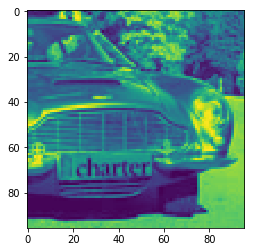

In [29]:
images_reconstructed = model.encoder(Variable(torch.FloatTensor(images).to(device)))
images_reconstructed = model.encoder2(images_reconstructed)
images_reconstructed = model.decoder(images_reconstructed)
images_reconstructed = model.decoder2(images_reconstructed)
plt.imshow(images[23].cpu().detach().numpy().reshape(96,96), interpolation='none')
# plt.imshow(images_reconstructed[28].cpu().detach().numpy().reshape(96,96), interpolation='none')

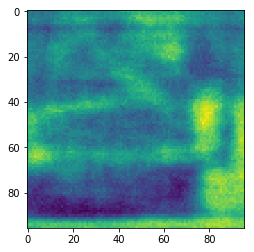

In [30]:
plt.imshow(images_reconstructed[23].cpu().detach().numpy().reshape(96,96), interpolation='none')

In [8]:
# images = read_all_images("../AML_Assignment2/data/stl10_binary/train_X.bin")
# images = torch.from_numpy(images)

# images = images.type(torch.FloatTensor).to(device)
feature_rep = model.encoder(images)
feature_rep = model.encoder2(feature_rep)
print(feature_rep.size()[1])

2304


In [5]:
a = 2304
class nu_net(nn.Module):
   def __init__(self,features,classes):
       super(nu_net,self).__init__()
       self.features=features
       self.arch=nn.Sequential(
               nn.Linear(features,int(features/2)),
               nn.ReLU(),
               nn.Linear(int(features/2),int(features/4)),
               nn.ReLU(),
               nn.Linear(int(features/4),classes),
               nn.Softmax()
       )
   def forward(self,x):
       x = self.arch(x)
       return x

nn_epoch=100
# images = read_all_images("../AML_Assignment2/data/stl10_binary/train_X.bin")
# images = torch.from_numpy(images)
# images = images.type(torch.FloatTensor).to(device)


In [ ]:
classifier = nu_net(a,10).cuda()
optimizer_nn = torch.optim.Adam(classifier.parameters(), lr=0.00001)
criterion_nn = torch.nn.CrossEntropyLoss()

In [36]:
print(classifier)
feature_load= data_utils.TensorDataset(feature_rep, labels)
feature_loader = data_utils.DataLoader(feature_load,batch_size=50, shuffle=True)

nu_net(
  (arch): Sequential(
    (0): Linear(in_features=2304, out_features=1152, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1152, out_features=576, bias=True)
    (3): ReLU()
    (4): Linear(in_features=576, out_features=10, bias=True)
    (5): Softmax()
  )
)


NameError: name 'feature_rep' is not defined

In [14]:
m =[]
criteria  = nn.CrossEntropyLoss()
for ep in range(nn_epoch):
    for i,(feature,lo) in enumerate(feature_loader):
        feature = feature.type(torch.FloatTensor)
        lo = lo.type(torch.LongTensor)
        feature= feature.to(device)
        lo = lo.to(device)
        feature,lo = Variable(feature), Variable(lo)
#         lo = Variable(lo)
#         feature= Variable(feature)
#         out = classifier(feature)
#         l = l.type(torch.LongTensor)
        lo=lo-1
        optimizer_nn.zero_grad()
        output = classifier(feature)
        loss = criteria(output, lo)
        loss.backward()
        optimizer_nn.step()
#         print(l)
#         optimizer_nn.zero_grad()
#         loi = criterion_nn(out,l)
# #         print(loss.item())
#         loi.backward(retain_graph=True)
#         optimizer_nn.step()
        m.append(loss.item())
        if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(ep+1, nn_epoch, loss.item()))

    

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [1/100], Loss: 2.3377
Epoch [2/100], Loss: 2.3387
Epoch [3/100], Loss: 2.2626
Epoch [4/100], Loss: 2.2238
Epoch [5/100], Loss: 2.2037
Epoch [6/100], Loss: 2.1339
Epoch [7/100], Loss: 2.2667
Epoch [8/100], Loss: 2.3130
Epoch [9/100], Loss: 2.3250
Epoch [10/100], Loss: 2.1813
Epoch [11/100], Loss: 2.0886
Epoch [12/100], Loss: 2.1764
Epoch [13/100], Loss: 2.2196
Epoch [14/100], Loss: 2.2499
Epoch [15/100], Loss: 2.1651
Epoch [16/100], Loss: 2.1065
Epoch [17/100], Loss: 2.2339
Epoch [18/100], Loss: 2.1136
Epoch [19/100], Loss: 2.0338
Epoch [20/100], Loss: 2.1618
Epoch [21/100], Loss: 2.1134
Epoch [22/100], Loss: 2.1804
Epoch [23/100], Loss: 2.0825
Epoch [24/100], Loss: 2.0210
Epoch [25/100], Loss: 2.1160
Epoch [26/100], Loss: 2.1453
Epoch [27/100], Loss: 2.0974
Epoch [28/100], Loss: 1.9938
Epoch [29/100], Loss: 1.9471
Epoch [30/100], Loss: 2.1024
Epoch [31/100], Loss: 2.1706
Epoch [32/100], Loss: 2.0847
Epoch [33/100], Loss: 1.9704
Epoch [34/100], Loss: 2.0897
Epoch [35/100], Loss: 2

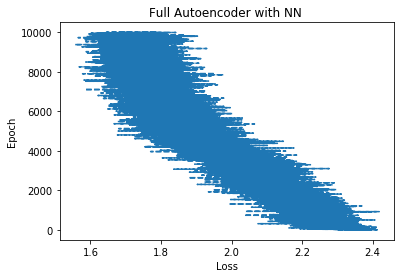

In [18]:
epoc=[i+1 for i in range(10000)]
plt.plot(m,epoc,linestyle='dashed')

### plot ROC
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.title('Full Autoencoder with NN ')
# plt.show()
plt.savefig("Full_AE_LOSS_EPOCH_Ques2_NN.png")

In [22]:
torch.save(classifier, "NN_with_FA.pth")

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type nu_net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [20]:
model_2 = autoencoder().cuda()
criterion = nn.MSELoss()
num_epochs = 100
learning_rate = 0.0001
optimizer = optim.Adam(model_2.parameters(), lr = learning_rate)
nn_epoch=100

In [22]:
los =[]
num_epochs=100
epoc=[]
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
total_step = len(images)
criteria  = nn.CrossEntropyLoss()
for ep in range(num_epochs):
    for i, (imag,label) in enumerate(trainLoader):
        imag = imag.type(torch.FloatTensor)
        label = label.type(torch.FloatTensor)
        imag = imag.to(device)
        label = label.to(device)
        imag,label = Variable(imag),Variable(label)
        optimizer.zero_grad()
        outputs = model_2(imag)
#         print(type(outputs[0]))
        loss = criterion(outputs, imag)
        loss2 = f.cosine_similarity(outputs, imag)
        loss2 = loss2.norm(1)
#         print(loss2)
#         print(loss.item(), loss2)
        lg = loss+loss2
        # Backward and optimize
        optimizer.zero_grad()
        lg.backward()
#         loss2.backward()
        optimizer.step()
        los.append(lg.data[0])
        if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(ep+1, nn_epoch, loss.item()))

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/100], Loss: 2440.3472
Epoch [2/100], Loss: 1871.9791
Epoch [3/100], Loss: 1483.6320
Epoch [4/100], Loss: 1253.1564
Epoch [5/100], Loss: 1361.0477
Epoch [6/100], Loss: 1254.2211
Epoch [7/100], Loss: 1242.2336
Epoch [8/100], Loss: 1159.2614
Epoch [9/100], Loss: 1112.2365
Epoch [10/100], Loss: 1033.5093
Epoch [11/100], Loss: 1119.4050
Epoch [12/100], Loss: 1020.2914
Epoch [13/100], Loss: 1085.5872
Epoch [14/100], Loss: 978.7763
Epoch [15/100], Loss: 1014.8523
Epoch [16/100], Loss: 983.8356
Epoch [17/100], Loss: 904.2278
Epoch [18/100], Loss: 934.2524
Epoch [19/100], Loss: 856.9203
Epoch [20/100], Loss: 797.1144
Epoch [21/100], Loss: 864.3593
Epoch [22/100], Loss: 792.3579
Epoch [23/100], Loss: 792.4068
Epoch [24/100], Loss: 881.0722
Epoch [25/100], Loss: 771.8961
Epoch [26/100], Loss: 788.1272
Epoch [27/100], Loss: 716.6447
Epoch [28/100], Loss: 833.6027
Epoch [29/100], Loss: 726.3129
Epoch [30/100], Loss: 710.3669
Epoch [31/100], Loss: 686.1154
Epoch [32/100], Loss: 729.5332
Epo

In [24]:
torch.save(model_2, "FA_with_cosine_and_MSE.pth")


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


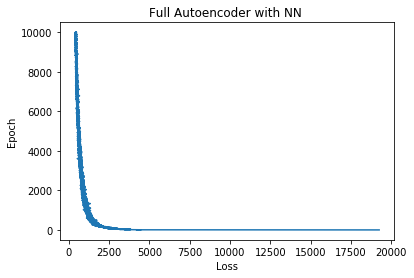

In [37]:
model_2 = torch.load("FA_with_cosine_and_MSE.pth")
epoch =[i+1 for i in range(10000)]
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.title('Full Autoencoder with NN ')
plt.plot(los, epoch)
plt.savefig("Full_AE_LOSS_EPOCH_Ques2_NN_cosine.png")

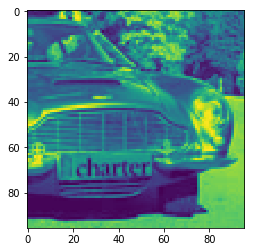

In [33]:
images_reconstructed_cosine = model_2.encoder(Variable(torch.FloatTensor(images).to(device)))
images_reconstructed_cosine = model_2.encoder2(images_reconstructed_cosine)
images_reconstructed_cosine = model_2.decoder(images_reconstructed_cosine)
images_reconstructed_cosine = model_2.decoder2(images_reconstructed_cosine)

plt.imshow(images[23].cpu().detach().numpy().reshape(96,96))

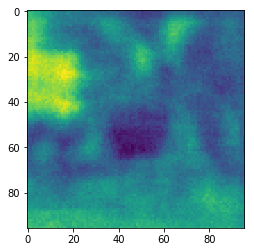

In [34]:
plt.imshow(images_reconstructed[2].cpu().detach().numpy().reshape(96,96), interpolation='none')

In [44]:
classifier_2 = nu_net(a,10).cuda()
optimizer_nn = torch.optim.Adam(classifier_2.parameters(), lr=0.00001)
# criterion_nn = torch.nn.CrossEntropyLoss()

In [45]:
print(device)
feature_rep = model_2.encoder(Variable(torch.FloatTensor(images).to(device)))
feature_rep = model_2.encoder2(feature_rep)
feature_load= data_utils.TensorDataset(feature_rep, labels)
feature_loader = data_utils.DataLoader(feature_load,batch_size=50, shuffle=True)

cuda:0


In [46]:
m =[]
criteria  = nn.CrossEntropyLoss()
for ep in range(nn_epoch):
    for i,(feature,lo) in enumerate(feature_loader):
        feature = feature.type(torch.FloatTensor)
        lo = lo.type(torch.LongTensor)
        feature= feature.to(device)
        lo = lo.to(device)
        feature,lo = Variable(feature), Variable(lo)
        lo=lo-1
        optimizer_nn.zero_grad()
        output = classifier_2(feature)
        loss = criteria(output, lo)
        loss.backward()
        optimizer_nn.step()
        m.append(loss.item())
        if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(ep+1, nn_epoch, loss.item()))


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [1/100], Loss: 2.4141
Epoch [2/100], Loss: 2.3811
Epoch [3/100], Loss: 2.3160
Epoch [4/100], Loss: 2.2210
Epoch [5/100], Loss: 2.2604
Epoch [6/100], Loss: 2.2794
Epoch [7/100], Loss: 2.2523
Epoch [8/100], Loss: 2.2605
Epoch [9/100], Loss: 2.3036
Epoch [10/100], Loss: 2.2794
Epoch [11/100], Loss: 2.1993
Epoch [12/100], Loss: 2.3607
Epoch [13/100], Loss: 2.2803
Epoch [14/100], Loss: 2.2781
Epoch [15/100], Loss: 2.3759
Epoch [16/100], Loss: 2.2987
Epoch [17/100], Loss: 2.2385
Epoch [18/100], Loss: 2.3201
Epoch [19/100], Loss: 2.3378
Epoch [20/100], Loss: 2.2605
Epoch [21/100], Loss: 2.3183
Epoch [22/100], Loss: 2.2391
Epoch [23/100], Loss: 2.2777
Epoch [24/100], Loss: 2.2988
Epoch [25/100], Loss: 2.2210
Epoch [26/100], Loss: 2.1388
Epoch [27/100], Loss: 2.3159
Epoch [28/100], Loss: 2.3037
Epoch [29/100], Loss: 2.2585
Epoch [30/100], Loss: 2.3032
Epoch [31/100], Loss: 2.3565
Epoch [32/100], Loss: 2.2360
Epoch [33/100], Loss: 2.2239
Epoch [34/100], Loss: 2.3179
Epoch [35/100], Loss: 2

In [7]:

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.relu = nn.ReLU(True)
        self.max = nn.MaxPool2d(2, stride=2, return_indices=True)  # b, 47*47*16
        self.conv2 = nn.Conv2d(16, 32, 3)  # b, 8, 3, 3
        self.relu2 = nn.ReLU(True)
        self.max2 = nn.MaxPool2d(2,stride=2, return_indices=True) # b, 22*22*32
        #DECODER>>>>
        self.maxun = nn.MaxUnpool2d(3, stride=2)
        self.unconv1 = nn.ConvTranspose2d(32,16, 3)  
        self.relu3 = nn.ReLU(True)
        self.maxun2 = nn.MaxUnpool2d(2,stride=2)        #92*92*16
        self.unconv2 = nn.ConvTranspose2d(16, 1, 3)  # 96*96*1
        self.relu4 = nn.ReLU(True)
        self.tan = nn.Tanh()
       

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x,indices = self.max(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x,indices_2 = self.max2(x)
        x = self.maxun(x,indices_2)
        x = self.unconv1(x)
        x = self.relu3(x)
        x = self.maxun2(x, indices)
        x = self.unconv2(x)
        x = self.relu4(x)
        return x
        
model_convAuto= ConvAutoencoder().cuda()
# learning_rate=0.001
# model_convAuto= ConvAutoencoder().cuda()
# print(model_convAuto)
# criterion = nn.MSELoss()
# optimizer_ca = torch.optim.Adam(model_convAuto.parameters(), lr=learning_rate,
#                              weight_decay=1e-5)

In [121]:
los =[]
num_epochs=100
epoc=[]
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
total_step = len(images)
criteria  = nn.MSELoss()
for ep in range(num_epochs):
    for i, (images,label) in enumerate(trainLoader):
        images = images.type(torch.FloatTensor)
        label = label.type(torch.FloatTensor)
        images = images.to(device)
        label = label.to(device)
        images,label = Variable(images),Variable(label)
        optimizer_ca.zero_grad()
        outputs = model_convAuto(images)
#         print(type(outputs[0]))
        loss = criterion(outputs, images)
#         loss2 = f.cosine_similarity(outputs, images)
#         loss2 = loss2.norm(1)
#         print(loss2)
#         print(loss.item(), loss2)
#         lg = loss+loss2
        # Backward and optimize
#         optimizer.zero_grad()
        loss.backward()
#         loss2.backward()
        optimizer_ca.step()
        los.append(loss.data[0])
        if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(ep+1, nn_epoch, loss.item()))


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/100], Loss: 3062.6892
Epoch [2/100], Loss: 2279.6917
Epoch [3/100], Loss: 1773.0588
Epoch [4/100], Loss: 1625.6553
Epoch [5/100], Loss: 1782.6819
Epoch [6/100], Loss: 1385.9534
Epoch [7/100], Loss: 1553.0575
Epoch [8/100], Loss: 1371.8639
Epoch [9/100], Loss: 1445.8092
Epoch [10/100], Loss: 1586.8328
Epoch [11/100], Loss: 1456.8060
Epoch [12/100], Loss: 1567.2268
Epoch [13/100], Loss: 1342.3883
Epoch [14/100], Loss: 1490.2517
Epoch [15/100], Loss: 1442.2454
Epoch [16/100], Loss: 1426.9174
Epoch [17/100], Loss: 1373.6553
Epoch [18/100], Loss: 1247.6132
Epoch [19/100], Loss: 1175.7406
Epoch [20/100], Loss: 1433.3346
Epoch [21/100], Loss: 1296.3339
Epoch [22/100], Loss: 1188.8717
Epoch [23/100], Loss: 1473.2570
Epoch [24/100], Loss: 1342.7308
Epoch [25/100], Loss: 1148.4550
Epoch [26/100], Loss: 1142.9589
Epoch [27/100], Loss: 1216.7268
Epoch [28/100], Loss: 1214.9458
Epoch [29/100], Loss: 1222.3136
Epoch [30/100], Loss: 1073.8656
Epoch [31/100], Loss: 1136.4646
Epoch [32/100], L

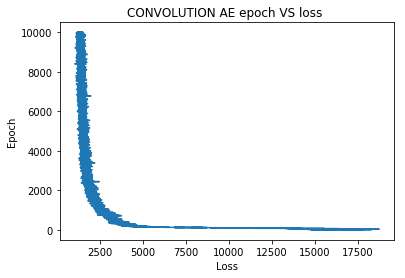

In [117]:
epoch =[i+1 for i in range(10000)]
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.title('CONVOLUTION AE epoch VS loss ')
plt.plot(los, epoch)
plt.savefig("CONV_AE_EPOCH_LOSS.png")

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_ConvAuto = torch.load("model_ConvAuto.pth")

im_ch = read_all_images_conv(images)
images_reconstructed_conv = model_convAuto(Variable(torch.FloatTensor(im_ch).to(device)))
plt.imshow(images[2].cpu().detach().numpy().reshape(96,96))



RuntimeError: CUDA error: out of memory

In [8]:
def read_all_images_conv(images):
   """
   :param path_to_data: the file containing the binary images from the STL-10 dataset
   :return: an array containing all the images
   """
   images_changed = np.reshape(images, (-1,1,96,96))
   return images_changed

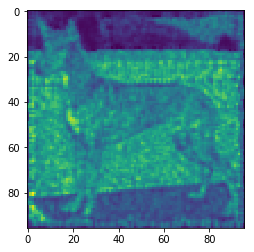

In [123]:
plt.imshow(images_reconstructed[2].cpu().detach().numpy().reshape(96,96), interpolation='none')

In [124]:
torch.save(model_convAuto, "model_ConvAuto.pth")

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvAutoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
torch.load("model_ConvAuto.pth")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
feature_rep =model_convAuto.conv1(Variable((images.to(device))))
feature_rep = model_convAuto.relu(feature_rep)
feature_rep,ind = model_convAuto.max(feature_rep)
feature_rep =  model_convAuto.conv2(feature_rep)
feature_rep =  model_convAuto.relu2(feature_rep)
feature_rep,ind =  model_convAuto.max2(feature_rep)

In [22]:
# torch.load("model_ConvAuto.pth")
# feature_rep.size()
import pickle as pkl
# pkl.dump(feature_rep, open("feature_rep_CONVAE.pkl","wb"))
feature_rep = pkl.load(open("feature_rep_CONVAE.pkl","rb"))
feature_load= data_utils.TensorDataset(feature_rep, labels)
feature_loader = data_utils.DataLoader(feature_load,batch_size=50, shuffle=True)

In [23]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [24]:
a = 15488
classifier_3 = nu_net(a,10).cuda()
optimizer_nn = torch.optim.Adam(classifier_3.parameters(), lr=0.00001)
m =[]
criteria  = nn.CrossEntropyLoss()
for ep in range(nn_epoch):
    for i,(feature,lo) in enumerate(feature_loader):
        feature = feature.type(torch.FloatTensor)
        lo = lo.type(torch.LongTensor)
        feature= feature.to(device)
        lo = lo.to(device)
        feature,lo = Variable(feature), Variable(lo)
        feature = feature.view(-1, 15488)
#         print((feature))
        lo=lo-1
        optimizer_nn.zero_grad()
        output = classifier_3(feature)
        loss = criteria(output, lo)
        loss.backward()
        optimizer_nn.step()
        m.append(loss.item())
        if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(ep+1, nn_epoch, loss.item()))

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [1/100], Loss: 2.3812
Epoch [2/100], Loss: 2.3212
Epoch [3/100], Loss: 2.3212
Epoch [4/100], Loss: 2.3412
Epoch [5/100], Loss: 2.3812
Epoch [6/100], Loss: 2.4212
Epoch [7/100], Loss: 2.3612
Epoch [8/100], Loss: 2.2812
Epoch [9/100], Loss: 2.3612
Epoch [10/100], Loss: 2.4012
Epoch [11/100], Loss: 2.3812
Epoch [12/100], Loss: 2.3012
Epoch [13/100], Loss: 2.3612
Epoch [14/100], Loss: 2.3212
Epoch [15/100], Loss: 2.3212
Epoch [16/100], Loss: 2.3612
Epoch [17/100], Loss: 2.3412
Epoch [18/100], Loss: 2.3812
Epoch [19/100], Loss: 2.3812
Epoch [20/100], Loss: 2.3812
Epoch [21/100], Loss: 2.3612
Epoch [22/100], Loss: 2.3412
Epoch [23/100], Loss: 2.3612
Epoch [24/100], Loss: 2.3012
Epoch [25/100], Loss: 2.3612
Epoch [26/100], Loss: 2.3612
Epoch [27/100], Loss: 2.3812
Epoch [28/100], Loss: 2.3612
Epoch [29/100], Loss: 2.4012
Epoch [30/100], Loss: 2.3812
Epoch [31/100], Loss: 2.3212
Epoch [32/100], Loss: 2.3812
Epoch [33/100], Loss: 2.4012
Epoch [34/100], Loss: 2.3812
Epoch [35/100], Loss: 2

torch.Size([50, 9216])


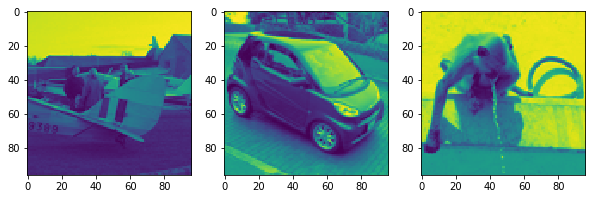

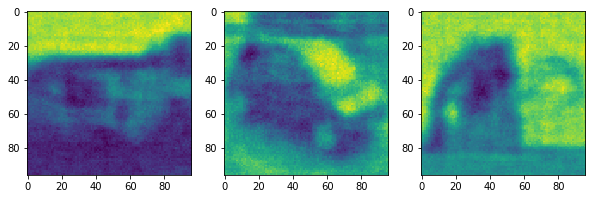

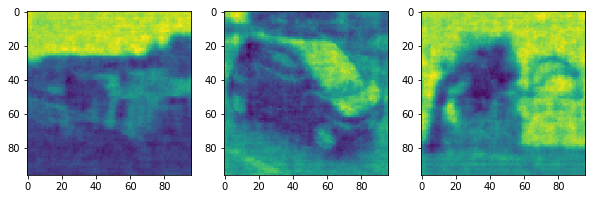

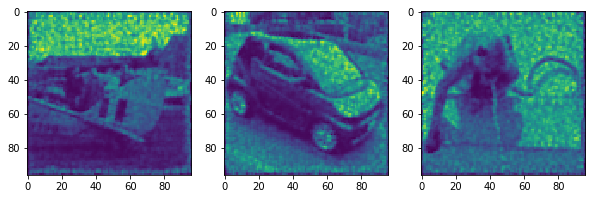

In [41]:
FE = autoencoder().cuda()
FE = torch.load("Full_Autoencoder.pth")
img =[]
lab=[]
for i,(img, lab) in enumerate(trainLoader): 
    break
print(img.size())
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
images_reconstructed = FE(Variable(torch.FloatTensor(img).to(device)))
w=15
h=15
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    im = img[i+5].cpu().detach().numpy().reshape(96,96)
    fig.add_subplot(rows, columns, i)
    plt.imshow(im)
plt.show()

fig2=plt.figure(figsize=(10, 10))
for i in range(1, columns*rows +1):
    ims = images_reconstructed[i+5].cpu().detach().numpy().reshape(96,96)
    fig2.add_subplot(rows, columns, i)
    plt.imshow(ims)
plt.show()


fig3=plt.figure(figsize=(10, 10))
FE_cosine = autoencoder().cuda()
FE_cosine = torch.load("FA_with_cosine_and_MSE.pth")
images_reconstructed_cos = FE_cosine(Variable(torch.FloatTensor(img).to(device)))
for i in range(1, columns*rows +1):
    img_c = images_reconstructed_cos[i+5].cpu().detach().numpy().reshape(96,96)
    fig3.add_subplot(rows, columns, i)
    plt.imshow(img_c)
plt.show()

img_conv = read_all_images_conv(img)
fig4=plt.figure(figsize=(10, 10))
Conv_auto= ConvAutoencoder().cuda()
Conv_auto = torch.load("model_ConvAuto.pth")
images_reconstructed_conv = Conv_auto(Variable(torch.FloatTensor(img_conv).to(device)))
for i in range(1, columns*rows +1):
    img_conv_v = images_reconstructed_conv[i+5].cpu().detach().numpy().reshape(96,96)
    fig4.add_subplot(rows, columns, i)
    plt.imshow(img_conv_v)
plt.show()

# for i in range(12):
#     plt.imshow(images[i].cpu().detach().numpy().reshape(96,96), interpolation='none')




In [32]:
FE_cosine = autoencoder().cuda()
FE_cosine = torch.load("FA_with_cosine_and_MSE.pth")
fig2=plt.figure(figsize=(10, 10))
images_reconstructed_cos = FE_cosine(Variable(torch.FloatTensor(img).to(device)))
for i in range(1, columns*rows +1):
    img = images_reconstructed_cos[i].cpu().detach().numpy().reshape(96,96)
    fig2.add_subplot(rows, columns, i)
    plt.imshow(im)
plt.show()


RuntimeError: size mismatch, m1: [96 x 96], m2: [9216 x 4608] at /opt/conda/conda-bld/pytorch_1535491974311/work/aten/src/THC/generic/THCTensorMathBlas.cu:249

<Figure size 720x720 with 0 Axes>

In [ ]:
Conv_auto= ConvAutoencoder().cuda()
Conv_auto = torch.load("model_ConvAuto.pth")


In [42]:
a = [0.049,0.055,0.053,0.068,0.06,0.046,0.059,0.047,0.055,0.051,0.034,0.04,0.044,0.053,0.044,0.036,0.03,0.044,0.041,0.035,0.036,0.04,0.041,0.029,0.033,0.033,0.023,0.018,0.035,0.03,0.032,0.022,0.017,0.035,0.019,0.032,0.018,0.025,0.025,0.029,0.029,0.018,0.018,0.031]
b = [0.078,0.084,0.077,0.081,0.085,0.082,0.079,0.074,0.083,0.073,0.076,0.076,0.071,0.072,0.073,0.062,0.067,0.072,0.077,0.072,0.064,0.075,0.076,0.065,0.057,0.069,0.063,0.074,0.065,0.066,0.067,0.065,0.058,0.057,0.066,0.061,0.06,0.057,0.058,0.059,0.059,0.065,0.061,0.068,0.059]
c = [0.068,0.055,0.063,0.052,0.064,0.063,0.058,0.052,0.057,0.042,0.057,0.051,0.054,0.057,0.047,0.05,0.048,0.029,0.053,0.065,0.043,0.039,0.041,0.038,0.046,0.062,0.051,0.047,0.049,0.052,0.037,0.05,0.038,0.042,0.047,0.041,0.032,0.047,0.048,0.039,0.05,0.048,0.039,0.033,0.028]
d = [0.088,0.091,0.089,0.089,0.087,0.089,0.087,0.09,0.087,0.088,0.088,0.089,0.082,0.087,0.084,0.086,0.083,0.084,0.087,0.086,0.081,0.085,0.085,0.086,0.087,0.084,0.084,0.087,0.084,0.085,0.086,0.079,0.089,0.084,0.085,0.081,0.081,0.076,0.081,0.084,0.077,0.074,0.081,0.075,0.085]

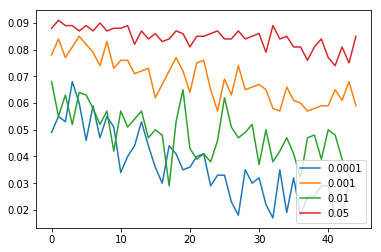

In [45]:
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)
plt.legend(["0.0001", "0.001", "0.01","0.05"], loc='lower right')
plt.show()